In [1]:
from IPython.display import Image

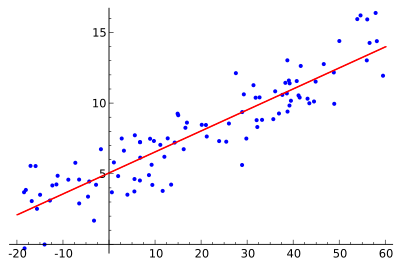

In [2]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png')

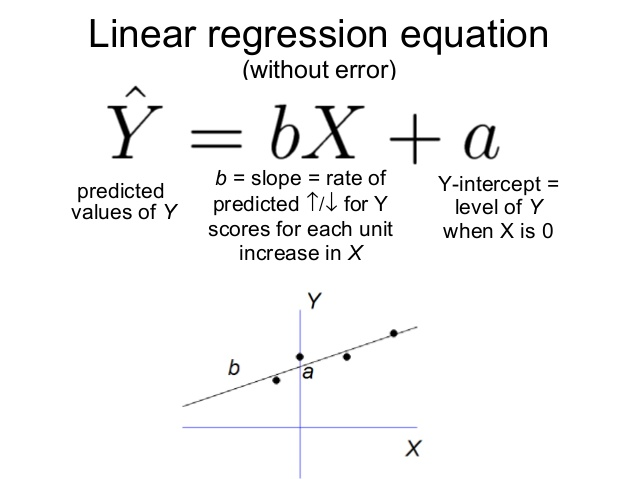

In [3]:
Image('https://image.slidesharecdn.com/8-1209490505240696-9/95/multiple-linear-regression-16-638.jpg')

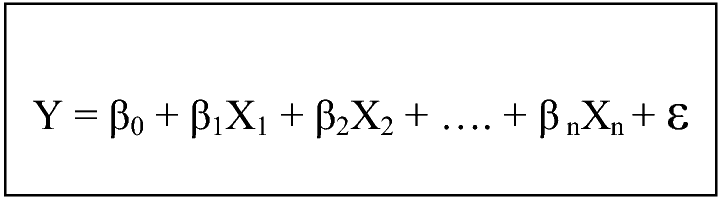

In [4]:
Image('http://abhijitbangera.com/wp-content/uploads/2017/04/multi-regression-equation.png')

# Boston Housing Data Set
[https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
### Atrtibute Information:
There are 14 attributes in each case of the dataset. They are:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in \$1000's

In [5]:
import sklearn
import pandas as pd
import numpy as np

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn import linear_model

In [9]:
# Load data into DataFrame
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE", "DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df = pd.read_csv(data_url, delimiter=r"\s+", names=col_names)

In [10]:
df.head()  # retrun fist n rows, default n = 5

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.shape # dimensionality of the DataFrame

(506, 14)

In [12]:
df[pd.isnull(df).any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [13]:
X = df[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE", "DIS","RAD","TAX","PTRATIO","B","LSTAT"]]

In [14]:
y = df[['MEDV']]

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
X.shape

(506, 13)

In [17]:
type(y)

pandas.core.frame.DataFrame

In [18]:
y.shape

(506, 1)

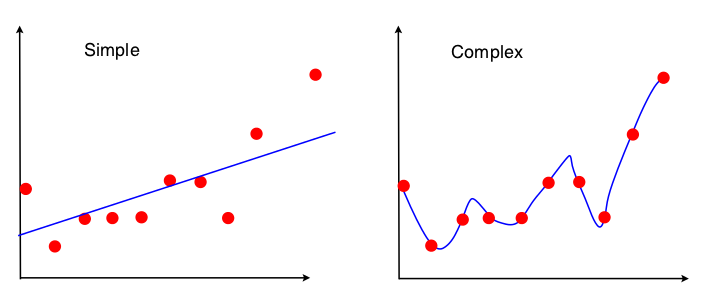

In [19]:
Image('http://i.stack.imgur.com/8RlJk.png')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [22]:
X_train.shape

(404, 13)

In [23]:
X_test.shape

(102, 13)

In [24]:
y_train.shape

(404, 1)

In [25]:
y_test.shape

(102, 1)

In [26]:
from sklearn import linear_model

In [27]:
reg = linear_model.LinearRegression()  # import the linear model

In [28]:
reg.fit(X_train, y_train)

/Users/bhuang/ben-github/ml-using-python/venv3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
reg.intercept_   # the Y intercept 

array([ 37.91248701])

In [30]:
reg.coef_

array([[ -1.30799852e-01,   4.94030235e-02,   1.09535045e-03,
          2.70536624e+00,  -1.59570504e+01,   3.41397332e+00,
          1.11887670e-03,  -1.49308124e+00,   3.64422378e-01,
         -1.31718155e-02,  -9.52369666e-01,   1.17492092e-02,
         -5.94076089e-01]])

In [31]:
reg.predict([[0.03237, 0.0, 2.18, 0,0.458, 6.998, 45.8, 6.0622, 3,222.0,18.7, 394.63, 2.94]])

array([[ 28.74300261]])

In [32]:
y_pred = reg.predict(X_test)

In [33]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307.0,17.4,387.38,3.13
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270.0,17.8,392.18,8.81
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666.0,20.2,396.90,34.77
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223.0,18.6,390.77,6.58


In [34]:
y_test[:5]

,MEDV
226,37.6
292,27.9
90,22.6
373,13.8
273,35.2


In [36]:
y_test_m = y_test.as_matrix()

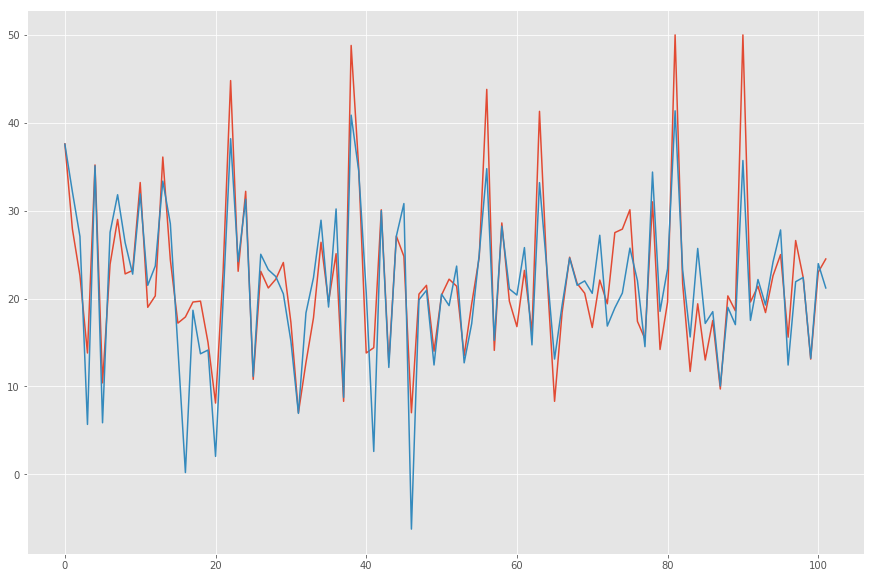

In [37]:
plt.figure(figsize=(15,10))
plt.plot(y_test_m, ms=50, alpha=1)
plt.plot(y_pred, ms=50, alpha=1)
legend_list =['y_test_m','y_pred']


In [38]:
y_test_m = y_test.as_matrix()